# 01 Prepración de los datos


Los árboles de decisión son conocidos por ser menos exigentes con la preparación de datos en comparación con otros algoritmos de aprendizaje automático.
Sin embargo, todavía hay algunas buenas prácticas a seguir para aprovechar al máximo su modelo



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## 0102 Carga el dataset: notas alumnos portugueses
Para probar a transformar datos para entrenar árboles de decisión el dataset sobre las notas finales de ciertos estudiantes portugueses de dos instituos en función de ciertas características socio-demográficas. El dataset original se puede encontrar en Kaggle ([aquí](https://www.kaggle.com/dipam7/student-grade-prediction)).

Esta vez no accederemos a la versión que yo había limpiado previamente, sino al dataset en su formato original, que podéis encontrar listo para importar en mi github: https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/notas_estudiantes.csv.

Importa este dataset en un dataframe llamado **df**.

In [2]:
# Url archivo raw
url = "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/notas_estudiantes.csv"
# Importa csv
df = pd.read_csv(url)
# Visualización primeras filas
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## 0201 Ensuciamos con nulos
Para probar cómo arreglar los nulos, vamos a meter primero ciertos nulos en nuestro dataframe.

In [4]:
df.columns[:-3]

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences'],
      dtype='object')

In [7]:
# se crear un df_2 donde se van a incluir NaN aleatorios.
df_2 = df.copy(deep=True)

# muestras aleatorias con valor nan
# con una fraccion del 5% por columna.
prop_nulos = 0.05
for col in df.columns[:-3]:
    indice_para_nulos = df_2.sample(frac=prop_nulos, replace=False).index
    df_2.loc[indice_para_nulos, col] = np.NaN

df_2.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,NaN,6.0,5,6,6
1,GP,F,17.0,NaN,GT3,T,NaN,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5,5,6
2,GP,F,15.0,NaN,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,NaN,3.0,10.0,7,8,10
3,GP,F,15.0,U,GT3,T,4.0,NaN,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15,14,15
4,GP,F,16.0,U,GT3,T,NaN,3.0,other,other,...,4.0,3.0,2.0,NaN,2.0,5.0,4.0,6,10,10
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15,15,15
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,NaN,...,4.0,4.0,4.0,1.0,1.0,3.0,0.0,12,12,11
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,...,NaN,1.0,4.0,1.0,1.0,1.0,6.0,6,5,6
8,GP,M,15.0,U,LE3,A,3.0,2.0,services,other,...,4.0,2.0,2.0,1.0,1.0,1.0,0.0,16,18,19
9,GP,M,15.0,U,NaN,T,3.0,4.0,other,NaN,...,5.0,5.0,1.0,1.0,1.0,5.0,0.0,14,15,15


In [8]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      375 non-null    object 
 1   sex         375 non-null    object 
 2   age         375 non-null    float64
 3   address     375 non-null    object 
 4   famsize     375 non-null    object 
 5   Pstatus     375 non-null    object 
 6   Medu        375 non-null    float64
 7   Fedu        375 non-null    float64
 8   Mjob        375 non-null    object 
 9   Fjob        375 non-null    object 
 10  reason      375 non-null    object 
 11  guardian    375 non-null    object 
 12  traveltime  375 non-null    float64
 13  studytime   375 non-null    float64
 14  failures    375 non-null    float64
 15  schoolsup   375 non-null    object 
 16  famsup      375 non-null    object 
 17  paid        375 non-null    object 
 18  activities  375 non-null    object 
 19  nursery     375 non-null    o

## 0202 Continuamos con el EDA

In [9]:
df_2.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,375.000000,375.00000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,395.000000,395.000000,395.000000
mean,16.680000,2.73600,2.536000,1.448000,2.032000,0.341333,3.922667,3.226667,3.114667,1.485333,2.288000,3.581333,5.650667,10.908861,10.713924,10.415190
std,1.276694,1.09308,1.088668,0.698999,0.836366,0.746309,0.899729,0.988887,1.106700,0.895128,1.292612,1.382926,7.842916,3.319195,3.761505,4.581443
min,15.000000,0.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.00000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.00000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.00000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.00000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [10]:
# Visualización coeficientes Pearson
plt.figure(figsize=(12, 9))
sns.heatmap(np.round(df_2.corr(), 2), vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

# ¿Por que no Funciona?

ValueError: could not convert string to float: 'GP'

<Figure size 1200x900 with 0 Axes>

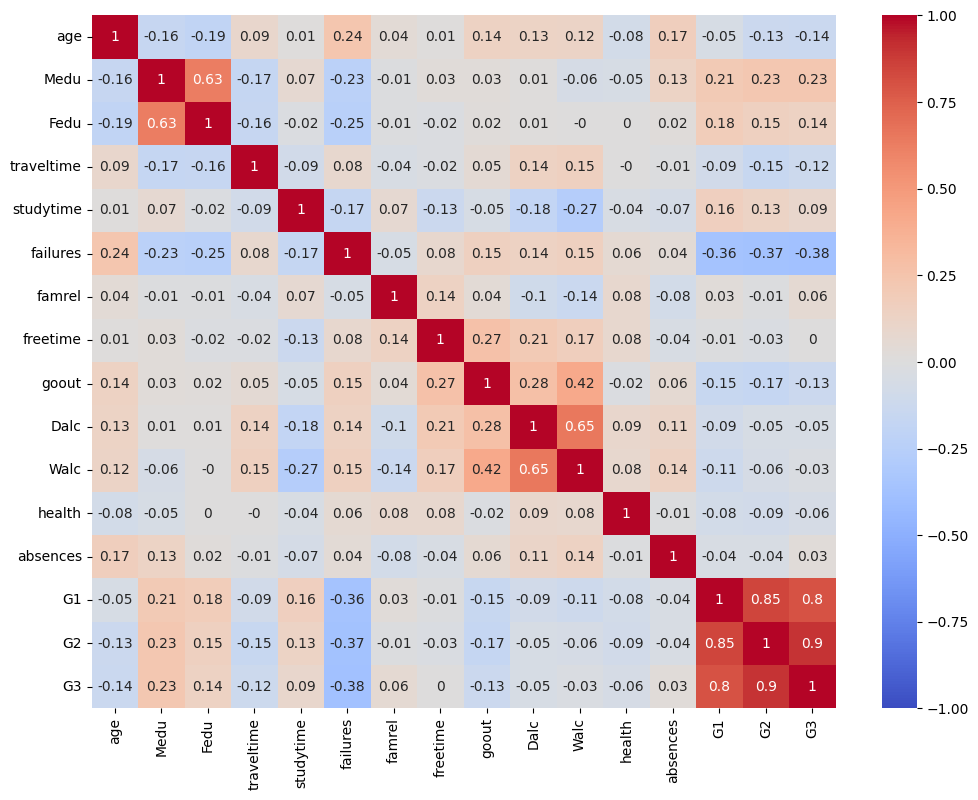

In [11]:
# Excluir todas las colunnas no-numericas
numeric_df = df_2.select_dtypes(include=[np.number])

corr_matrix = np.round(numeric_df.corr(), 2)
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.show()

# 03 Preparación de datos para árbol de decisión
Los árboles de decisión de scikit learn requiren:

*   Que no haya nulos entre las variables
*   Que todas las variables sean numéricas (hay que dumificar las categóricas)


## 0301 Inicialización de árbol
Recordemos cómo entrenar un árbol cuando las variables son numéricas (G2 y G3).

In [12]:
X = df_2[["G1", "G2"]]
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

G1    0
G2    0
dtype: int64

In [15]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=True)

4.0330633527395054

In [14]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- G2 <= 6.50
|   |   |--- G2 <= 4.50
|   |   |   |--- value: [0.00]
|   |   |--- G2 >  4.50
|   |   |   |--- value: [4.00]
|   |--- G2 >  6.50
|   |   |--- G2 <= 9.50
|   |   |   |--- value: [7.50]
|   |   |--- G2 >  9.50
|   |   |   |--- value: [9.78]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



## 0301 Limpieza de nulos

### 030101 Qué pasa cuando hay nulos en los datos

In [16]:
df_2[["absences", "G1", "G2", "G3"]].head()

,absences,G1,G2,G3
0,6.0,5,6,6
1,4.0,5,5,6
2,10.0,7,8,10
3,2.0,15,14,15
4,4.0,6,10,10


In [17]:
X = df_2[["absences", "G1", "G2"]]
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

absences    20
G1           0
G2           0
dtype: int64

In [18]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

# ¿por que no fuciona?

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### 030202 Eliminando nulos
Con el método .[dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html).

In [19]:
X = df_2.dropna(subset=["absences"])[["absences", "G1", "G2"]]
y = df_2.dropna(subset=["absences"])["G3"]

display(len(X))
display(X.isna().sum())

375

absences    0
G1          0
G2          0
dtype: int64

In [20]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.6794828645012536

In [21]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [0.29]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [6.00]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [6.41]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [9.35]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.52]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.10]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.21]



**Problemas de este enfoque**

Eliminando filas tenemos varios problemas:
*   Perdemos información al perder filas

*   Sí, nuestra variable estaba a nulo en la filas que hemos eliminado, pero quizás había información útil en el resto de variables que también nos estamos perdiendo.
*   No hemos resuelto el problema de los nulos


Cuando queramos hacer predicciones sobre datos nuevos que contengan nulos tendremos igualmente que desarrollar un método para tratarlos si queremos producir una predicción.



### 030103 Rellenando nulos
Usando el método .[fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

#### Rellenando con 0s

In [22]:
X = df_2.loc[:, ["absences", "G1", "G2"]]
X["absences"] = X["absences"].fillna(0)
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

absences    0
G1          0
G2          0
dtype: int64

In [23]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.7313310959319717

In [24]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [0.73]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [6.28]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [6.41]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [9.35]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



#### Rellenando con mediana

In [25]:
X = df_2.loc[:, ["absences", "G1", "G2"]]
X["absences"] = X["absences"].fillna(X["absences"].median())
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

absences    0
G1          0
G2          0
dtype: int64

In [26]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

1.6507863653472377

In [27]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

|--- G2 <= 10.50
|   |--- absences <= 1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [0.29]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [6.00]
|   |--- absences >  1.00
|   |   |--- G2 <= 7.50
|   |   |   |--- value: [6.44]
|   |   |--- G2 >  7.50
|   |   |   |--- value: [9.34]
|--- G2 >  10.50
|   |--- G2 <= 13.50
|   |   |--- G2 <= 12.50
|   |   |   |--- value: [11.47]
|   |   |--- G2 >  12.50
|   |   |   |--- value: [13.11]
|   |--- G2 >  13.50
|   |   |--- G2 <= 16.50
|   |   |   |--- value: [15.06]
|   |   |--- G2 >  16.50
|   |   |   |--- value: [18.20]



#### Reflexión sobre estos dos últimos árboles
Los dos son iguales!

Pero el método de relleno de nulos para "absences" provocaba que esos 20 alumnos acabaran a un lado o a otro de la segunda partición en la rama G2<=10.5.

El método de relleno va a influír en dónde caen las filas con nulos cuando hay una partición, por eso es importante y deberá seguir una lógica lo más realista posible.

### 030104 EJERCICIO
Queremos hacer un árbol que prediga la nota 'G3' con las variables ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'].

Estas variables tienen nulos. Haz 3 modelos:


1.   Un modelo eliminando los nulos
2.   Un modelo rellenando los nulos con 0s
3.   Un modelo rellenando los nulos con un método un poco más avanzado, de tu elección.



In [ ]:
df_2[
    [
        "age",
        "Medu",
        "Fedu",
        "traveltime",
        "studytime",
        "failures",
        "famrel",
        "freetime",
        "goout",
        "Dalc",
        "Walc",
        "health",
        "absences",
    ]
].head()

#### Modelo 1
Eliminando los nulos

In [ ]:
# Genera las variables X e Y
cols = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences",
]

X = df_2.dropna(subset=cols)[cols]
y = df_2.dropna(subset=cols)["G3"]

# Visualiza la longitud y el número de nulos
display(len(X))
display(X.isna().sum())

In [ ]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

#### Modelo 2
Rellenamos los nulos con 0s.

In [ ]:
# Genera las variables X e Y
cols = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences",
]
X = df_2.loc[:, cols]
X[cols] = X[cols].fillna(0)
y = df_2["G3"]

# Visualiza la longitud y el número de nulos
display(len(X))
display(X.isna().sum())

In [ ]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

#### Modelo 3
Rellenamos los nulos.

In [ ]:
# Genera las variables X e Y
cols = [
    "age",
    "Medu",
    "Fedu",
    "traveltime",
    "studytime",
    "failures",
    "famrel",
    "freetime",
    "goout",
    "Dalc",
    "Walc",
    "health",
    "absences",
]
X = df_2.loc[:, cols]
for col in cols:
    X[col] = X[col].fillna(X[col].mean())
y = df_2["G3"]

In [ ]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

## 0302 Dumificación vars categóricas

### 030201 Qué pasa cuando hay vars categóricas

In [28]:
df_2[["school", "sex", "Mjob", "G3"]].head()

,school,sex,Mjob,G3
0,GP,F,at_home,6
1,GP,F,at_home,6
2,GP,F,at_home,10
3,GP,F,health,15
4,GP,F,other,10


In [29]:
X = df_2[["school", "sex", "Mjob"]]
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

school    20
sex       20
Mjob      20
dtype: int64

In [30]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=3)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

# ¿ Por que da error ?

ValueError: could not convert string to float: 'GP'

### 030202 Dumificación
Utilizando la función [.get_dummies()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [31]:
X.head()

,school,sex,Mjob
0,GP,F,at_home
1,GP,F,at_home
2,GP,F,at_home
3,GP,F,health
4,GP,F,other


In [32]:
pd.get_dummies(X, prefix_sep="_").head()

,school_GP,school_MS,sex_F,sex_M,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,True,False,True,False,True,False,False,False,False
1,True,False,True,False,True,False,False,False,False
2,True,False,True,False,True,False,False,False,False
3,True,False,True,False,False,True,False,False,False
4,True,False,True,False,False,False,True,False,False


In [33]:
# dummy_na=True
# Incluirá una columna dummy adicional para los valores NaN (valores faltantes) en los datos.
# Esto es útil si quieres tratar los valores faltantes como una categoría separada.
pd.get_dummies(X, prefix_sep="__", dummy_na=True).head()

,school__GP,school__MS,school__nan,sex__F,sex__M,sex__nan,Mjob__at_home,Mjob__health,Mjob__other,Mjob__services,Mjob__teacher,Mjob__nan
0,True,False,False,True,False,False,True,False,False,False,False,False
1,True,False,False,True,False,False,True,False,False,False,False,False
2,True,False,False,True,False,False,True,False,False,False,False,False
3,True,False,False,True,False,False,False,True,False,False,False,False
4,True,False,False,True,False,False,False,False,True,False,False,False


In [34]:
# drop_first=True
# Elimina la primera categoría en cada columna para evitar la multicolinealidad.
# En el caso de regresiones u otros modelos estadísticos, esto es útil porque evita la trampa de las variables ficticias (dummy variable trap),
# que es una situación donde las variables dummy son perfectamente colineales.

pd.get_dummies(X, prefix_sep="_", drop_first=True).head()

,school_MS,sex_M,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,True,False,False


In [35]:
pd.get_dummies(X, prefix_sep="_", drop_first=True, columns=["school"]).head()

,sex,Mjob,school_MS
0,F,at_home,False
1,F,at_home,False
2,F,at_home,False
3,F,health,False
4,F,other,False


In [36]:
X = pd.get_dummies(df_2[["school", "sex", "Mjob"]], prefix_sep="_", drop_first=True)
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

school_MS        0
sex_M            0
Mjob_health      0
Mjob_other       0
Mjob_services    0
Mjob_teacher     0
dtype: int64

In [37]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

4.473528664641317

In [38]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

|--- Mjob_health <= 0.50
|   |--- sex_M <= 0.50
|   |   |--- Mjob_teacher <= 0.50
|   |   |   |--- Mjob_services <= 0.50
|   |   |   |   |--- value: [9.44]
|   |   |   |--- Mjob_services >  0.50
|   |   |   |   |--- value: [10.31]
|   |   |--- Mjob_teacher >  0.50
|   |   |   |--- school_MS <= 0.50
|   |   |   |   |--- value: [11.39]
|   |   |   |--- school_MS >  0.50
|   |   |   |   |--- value: [10.50]
|   |--- sex_M >  0.50
|   |   |--- Mjob_services <= 0.50
|   |   |   |--- school_MS <= 0.50
|   |   |   |   |--- value: [10.59]
|   |   |   |--- school_MS >  0.50
|   |   |   |   |--- value: [8.87]
|   |   |--- Mjob_services >  0.50
|   |   |   |--- school_MS <= 0.50
|   |   |   |   |--- value: [11.82]
|   |   |   |--- school_MS >  0.50
|   |   |   |   |--- value: [11.50]
|--- Mjob_health >  0.50
|   |--- school_MS <= 0.50
|   |   |--- sex_M <= 0.50
|   |   |   |--- value: [11.83]
|   |   |--- sex_M >  0.50
|   |   |   |--- value: [12.15]
|   |--- school_MS >  0.50
|   |   |--- sex_M <

# 04 Ejercicio
Utilizando df_2 (la versión del dataset con nulos), crea un modelo que prediga 'G3' utilizando las variables predictivas:

['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'studytime', 'failures', 'schoolsup', 'health', 'absences']

Deberás tratar las variables categóricas y los nulos. Obtén la predicción, su calidad, y visualiza el árbol.



In [39]:
df_2[["school", "Mjob", "age"]].head()

,school,Mjob,age
0,GP,at_home,18.0
1,GP,at_home,17.0
2,GP,at_home,15.0
3,GP,health,15.0
4,GP,other,16.0


In [40]:
# Fíjate en lo que hace esto:
pd.get_dummies(
    df_2[["school", "Mjob", "age"]],
    prefix_sep="_",
    drop_first=True,
    columns=["school", "Mjob"],
)

,age,school_MS,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher
0,18.0,False,False,False,False,False
1,17.0,False,False,False,False,False
2,15.0,False,False,False,False,False
3,15.0,False,True,False,False,False
4,16.0,False,False,True,False,False
...,...,...,...,...,...,...
390,NaN,True,False,False,True,False
391,17.0,True,False,False,True,False
392,21.0,True,False,True,False,False
393,18.0,True,False,False,True,False


In [41]:
# cols
cols = [
    "school",
    "sex",
    "age",
    "famsize",
    "Pstatus",
    "Medu",
    "Fedu",
    "Mjob",
    "Fjob",
    "studytime",
    "failures",
    "schoolsup",
    "health",
    "absences",
]
df_2[cols].head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,studytime,failures,schoolsup,health,absences
0,GP,F,18.0,GT3,A,4.0,4.0,at_home,teacher,2.0,0.0,yes,NaN,6.0
1,GP,F,17.0,GT3,T,NaN,1.0,at_home,other,NaN,0.0,no,3.0,4.0
2,GP,F,15.0,LE3,T,1.0,1.0,at_home,other,2.0,3.0,yes,3.0,10.0
3,GP,F,15.0,GT3,T,4.0,NaN,health,services,3.0,0.0,no,5.0,2.0
4,GP,F,16.0,GT3,T,NaN,3.0,other,other,2.0,0.0,no,5.0,4.0


In [42]:
# Dumifica las variables categóricas
X = pd.get_dummies(
    df_2[cols],
    prefix_sep="_",
    drop_first=True,
    columns=["school", "sex", "famsize", "Pstatus", "Mjob", "Fjob", "schoolsup"],
)
y = df_2["G3"]

display(len(X))
display(X.isna().sum())

395

age              20
Medu             20
Fedu             20
studytime        20
failures         20
health           20
absences         20
school_MS         0
sex_M             0
famsize_LE3       0
Pstatus_T         0
Mjob_health       0
Mjob_other        0
Mjob_services     0
Mjob_teacher      0
Fjob_health       0
Fjob_other        0
Fjob_services     0
Fjob_teacher      0
schoolsup_yes     0
dtype: int64

In [43]:
# Limpiamos los nulos
for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

display(len(X))
display(X.isna().sum())

395

age              0
Medu             0
Fedu             0
studytime        0
failures         0
health           0
absences         0
school_MS        0
sex_M            0
famsize_LE3      0
Pstatus_T        0
Mjob_health      0
Mjob_other       0
Mjob_services    0
Mjob_teacher     0
Fjob_health      0
Fjob_other       0
Fjob_services    0
Fjob_teacher     0
schoolsup_yes    0
dtype: int64

In [44]:
# Inicializo un árbol
arbolito = tree.DecisionTreeRegressor(max_depth=4)
# Entreno el árbol
arbolito = arbolito.fit(X=X, y=y)
# Uso el árbol para predecir y
pred_arbolito = arbolito.predict(X)
# Cómo de buena es la predicción?
mean_squared_error(y, pred_arbolito, squared=False)

3.5683263836911596

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbolito, feature_names=list(X.columns))
print(esquema_print)

# 01 Como preparar los datos del dataset

Fundamentos de preparacion de datos para árboles de decisión

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0101 Carga del dataset: Salud del Feto
Para probar a hacer árboles de decisión de clasificación multiclas utilizaremos un dataset sobre el estado de salud de un feto que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/fetal-health-classification)).

Podéis encontrar el archivo listo para importar en mi github: https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/fetal_health.csv.

Importa este dataset en un dataframe llamado **df**.

Descripción de las columnas:
* baseline value: Baseline Fetal Heart Rate (FHR)
* accelerations: Number of accelerations per second
* fetal_movement: Number of fetal movements per second
* uterine_contractions: Number of uterine contractions per second
* light_decelerations: Number of LDs per second
* severe_decelerations: Number of SDs per second
* prolongued_decelerations: Number of PDs per second
* abnormal_short_term_variability: Percentage of time with abnormal short term variability
* mean_value_of_short_term_variability: Mean value of short term variability
* percentage_of_time_with_abnormal_long_term_variability: Percentage of time with abnormal long term variability


Descripción de la clase:
* 1 = Normal
* 2 = Suspect
* 3 = Pathological

In [ ]:
# Url archivo raw
url = (
    "https://raw.githubusercontent.com/abelmmg/TheValley_AI/main/fetal_health.csv"
)

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 02 Valores nulos

In [ ]:
# Contar valores nulos en cada columna
null_counts = df.isnull().sum()
print(null_counts)

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [ ]:
# Vemos que el dataset no tiene valores nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Se van a alternar los datos del dataset para trabajar con carectisticas con valores nulos.

In [ ]:
# vamos a agregar aleatoriamente nulos para ver la diferencia.
df_null = df.copy(deep=True)
num_nulls = 500
column = 'histogram_median'

np.random.seed(0)
random_indices = np.random.choice(df_null.index, num_nulls, replace=False)

# Asignar nan a los indices seleccinados
df_null.loc[random_indices, column] = np.nan

df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# Contar valores nulos en cada columna
null_counts = df_null.isnull().sum()
print(null_counts)

baseline value                                              0
accelerations                                               0
fetal_movement                                              0
uterine_contractions                                        0
light_decelerations                                         0
severe_decelerations                                        0
prolongued_decelerations                                    0
abnormal_short_term_variability                             0
mean_value_of_short_term_variability                        0
percentage_of_time_with_abnormal_long_term_variability      0
mean_value_of_long_term_variability                         0
histogram_width                                             0
histogram_min                                               0
histogram_max                                               0
histogram_number_of_peaks                                   0
histogram_number_of_zeroes                                  0
histogra

In [ ]:
# Solo mostrar la columnas con null.
null_counts = df_null.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

histogram_median    500
dtype: int64


In [ ]:
# vamos a crear una columnas con nombres de personas
# y solo asingar nombre a un numero cocreto.

# Crear una lista de nombres
nombres = ['Ana', 'Luis', 'Carlos', 'Marta', 'Elena', 'Jorge', 'Lucía', 'Pedro', 'Sara', 'Miguel']
asignar = 2100
column = 'Nombre'

# Generar una serie de nombres aleatorios
np.random.seed(0)  # Para reproducibilidad
nombres_aleatorios = np.random.choice(nombres, size=asignar)
random_indices = np.random.choice(df_null.index, asignar, replace=False)

df_null.loc[random_indices, column] = nombres_aleatorios

In [ ]:
# Observamos el resultado.
df_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
# como ver filas de los nombres con valores nulos?
df_null[df_null['Nombre'].isnull()]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre
73,140.0,0.008,0.004,0.004,0.000,0.0,0.000,52.0,1.9,0.0,...,176.0,2.0,0.0,144.0,147.0,147.0,18.0,1.0,1.0,NaN
107,125.0,0.007,0.004,0.006,0.002,0.0,0.000,22.0,2.1,0.0,...,178.0,8.0,0.0,126.0,126.0,NaN,11.0,0.0,1.0,NaN
268,126.0,0.007,0.000,0.003,0.000,0.0,0.000,48.0,0.7,0.0,...,155.0,2.0,0.0,133.0,135.0,135.0,6.0,0.0,1.0,NaN
281,118.0,0.005,0.000,0.010,0.003,0.0,0.000,41.0,2.5,0.0,...,171.0,6.0,0.0,123.0,122.0,124.0,19.0,0.0,1.0,NaN
474,150.0,0.000,0.001,0.000,0.000,0.0,0.000,84.0,0.3,32.0,...,156.0,0.0,0.0,150.0,150.0,NaN,1.0,1.0,3.0,NaN
504,128.0,0.008,0.014,0.004,0.000,0.0,0.000,40.0,1.1,0.0,...,182.0,7.0,0.0,129.0,139.0,136.0,25.0,0.0,1.0,NaN
588,120.0,0.000,0.010,0.004,0.000,0.0,0.000,38.0,1.3,0.0,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1.0,1.0,NaN
602,144.0,0.010,0.007,0.001,0.001,0.0,0.000,71.0,0.8,0.0,...,176.0,3.0,0.0,156.0,154.0,NaN,6.0,1.0,1.0,NaN
632,144.0,0.000,0.002,0.000,0.000,0.0,0.000,47.0,0.8,11.0,...,164.0,5.0,1.0,153.0,151.0,152.0,3.0,1.0,2.0,NaN
693,133.0,0.004,0.470,0.005,0.003,0.0,0.001,29.0,1.7,0.0,...,177.0,7.0,1.0,133.0,129.0,133.0,27.0,0.0,1.0,NaN


## 0201 Borrar filas con valores nulos

dropna()

In [ ]:
df_null['Nombre'].dropna()

0        Pedro
1          Ana
2        Pedro
3        Pedro
4       Carlos
         ...  
2121     Pedro
2122       Ana
2123     Marta
2124       Ana
2125     Marta
Name: Nombre, Length: 2100, dtype: object

## 0202 Ejercicio

Mostrar por pantalla los tamaños (shape) de los datasets resultantes de:
* Borrar los registros que tienen un null en la columna 'Nombres'
* Borrar los registros que tienen un null en cualquier columna

In [ ]:

# dataframe sin valores nulo en la columna 'Nombres'
#df_null['Nombre'].dropna()
print("Filas en la columna Nombre antes de borrar nulos: " + str(df_null['Nombre'].shape))
print("Filas en la columna Nombre después de borrar nulos: " + str(df_null['Nombre'].dropna().shape))

# dataframe sin valores nulo en cualquier columna
#df_null.dropna()
print("Filas en el dataset antes de borrar nulos: " + str(df_null.shape))
print("Filas en el dataset después de borrar nulos: " + str(df_null.dropna().shape))


Filas en la columna Nombre antes de borrar nulos: (2126,)
Filas en la columna Nombre después de borrar nulos: (2100,)
Filas en el dataset antes de borrar nulos: (2126, 23)
Filas en el dataset después de borrar nulos: (1609, 23)


In [ ]:
# borrar solo registros de las columnas con valore nulos
df_null.dropna(subset=["Nombre"])

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,Pedro
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,NaN,12.0,0.0,1.0,Ana
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Pedro
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Pedro
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Carlos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,NaN,2.0,0.0,2.0,Pedro
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,NaN,3.0,1.0,2.0,Ana
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,Marta
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,Ana


In [ ]:
# Borrar nulos de una lista de campos.
df_null.dropna(subset=["Nombre", "histogram_median"])

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre
0,120.0,0.000,0.000,0.000,0.000,0.0,0.000,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,Pedro
2,133.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Pedro
3,134.0,0.003,0.000,0.008,0.003,0.0,0.000,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Pedro
4,132.0,0.007,0.000,0.008,0.000,0.0,0.000,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Carlos
5,134.0,0.001,0.000,0.010,0.009,0.0,0.002,26.0,5.9,0.0,...,200.0,5.0,3.0,76.0,107.0,107.0,170.0,0.0,3.0,Elena
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,140.0,0.000,0.000,0.007,0.001,0.0,0.000,79.0,0.6,27.0,...,150.0,1.0,0.0,144.0,141.0,145.0,1.0,1.0,1.0,Sara
2120,140.0,0.000,0.000,0.005,0.001,0.0,0.000,77.0,0.7,17.0,...,155.0,2.0,0.0,145.0,143.0,145.0,2.0,0.0,1.0,Elena
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.000,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,Marta
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.000,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,Ana


In [ ]:
df_null

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0,Pedro
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,198.0,6.0,1.0,141.0,136.0,NaN,12.0,0.0,1.0,Ana
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0,Pedro
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0,Pedro
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0,Carlos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,177.0,4.0,0.0,153.0,150.0,NaN,2.0,0.0,2.0,Pedro
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,169.0,6.0,0.0,152.0,148.0,NaN,3.0,1.0,2.0,Ana
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0,Marta
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0,Ana


## 0203 Corrección de valores nulos con un valor

fillna

In [ ]:
# corregir valores con fillna

# todos los campos con valor 0, cuidado!!!
#df_null.fillna(0).info()

df_null['Nombre'] = df_null['Nombre'].fillna("DESCONOCIDO")

df_null[df_null['Nombre']  == "DESCONOCIDO"]

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre
73,140.0,0.008,0.004,0.004,0.000,0.0,0.000,52.0,1.9,0.0,...,176.0,2.0,0.0,144.0,147.0,147.0,18.0,1.0,1.0,DESCONOCIDO
107,125.0,0.007,0.004,0.006,0.002,0.0,0.000,22.0,2.1,0.0,...,178.0,8.0,0.0,126.0,126.0,NaN,11.0,0.0,1.0,DESCONOCIDO
268,126.0,0.007,0.000,0.003,0.000,0.0,0.000,48.0,0.7,0.0,...,155.0,2.0,0.0,133.0,135.0,135.0,6.0,0.0,1.0,DESCONOCIDO
281,118.0,0.005,0.000,0.010,0.003,0.0,0.000,41.0,2.5,0.0,...,171.0,6.0,0.0,123.0,122.0,124.0,19.0,0.0,1.0,DESCONOCIDO
474,150.0,0.000,0.001,0.000,0.000,0.0,0.000,84.0,0.3,32.0,...,156.0,0.0,0.0,150.0,150.0,NaN,1.0,1.0,3.0,DESCONOCIDO
504,128.0,0.008,0.014,0.004,0.000,0.0,0.000,40.0,1.1,0.0,...,182.0,7.0,0.0,129.0,139.0,136.0,25.0,0.0,1.0,DESCONOCIDO
588,120.0,0.000,0.010,0.004,0.000,0.0,0.000,38.0,1.3,0.0,...,162.0,6.0,0.0,119.0,118.0,120.0,4.0,-1.0,1.0,DESCONOCIDO
602,144.0,0.010,0.007,0.001,0.001,0.0,0.000,71.0,0.8,0.0,...,176.0,3.0,0.0,156.0,154.0,NaN,6.0,1.0,1.0,DESCONOCIDO
632,144.0,0.000,0.002,0.000,0.000,0.0,0.000,47.0,0.8,11.0,...,164.0,5.0,1.0,153.0,151.0,152.0,3.0,1.0,2.0,DESCONOCIDO
693,133.0,0.004,0.470,0.005,0.003,0.0,0.001,29.0,1.7,0.0,...,177.0,7.0,1.0,133.0,129.0,133.0,27.0,0.0,1.0,DESCONOCIDO


In [ ]:
# re-emplezar valores de mas de una columna
# Primero vamos a crear columnas adicionales como soporte.

df_null["val1"] = np.nan
df_null["val2"] = np.nan
df_null["val3"] = 0

df_null

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre,val1,val2,val3
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,120.0,137.0,121.0,73.0,1.0,2.0,Pedro,NaN,NaN,0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,141.0,136.0,NaN,12.0,0.0,1.0,Ana,NaN,NaN,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,141.0,135.0,138.0,13.0,0.0,1.0,Pedro,NaN,NaN,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,137.0,134.0,137.0,13.0,1.0,1.0,Pedro,NaN,NaN,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,137.0,136.0,138.0,11.0,1.0,1.0,Carlos,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,153.0,150.0,NaN,2.0,0.0,2.0,Pedro,NaN,NaN,0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,152.0,148.0,NaN,3.0,1.0,2.0,Ana,NaN,NaN,0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,153.0,148.0,152.0,4.0,1.0,2.0,Marta,NaN,NaN,0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,152.0,147.0,151.0,4.0,1.0,2.0,Ana,NaN,NaN,0


In [ ]:
# re-emplezar valores de mas de una columna

# utilizamos un diccionario: valores_pordefecto
valores_pordefecto = {
    "val1": "YYYY",
    "val2": 111,
    "val3": 1
}

d = df_null.fillna(value=valores_pordefecto)
d

# ¿que pasa con val3?

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health,Nombre,val1,val2,val3
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,120.0,137.0,121.0,73.0,1.0,2.0,Pedro,YYYY,111.0,0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,141.0,136.0,NaN,12.0,0.0,1.0,Ana,YYYY,111.0,0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,141.0,135.0,138.0,13.0,0.0,1.0,Pedro,YYYY,111.0,0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,137.0,134.0,137.0,13.0,1.0,1.0,Pedro,YYYY,111.0,0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,137.0,136.0,138.0,11.0,1.0,1.0,Carlos,YYYY,111.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,153.0,150.0,NaN,2.0,0.0,2.0,Pedro,YYYY,111.0,0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,152.0,148.0,NaN,3.0,1.0,2.0,Ana,YYYY,111.0,0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,153.0,148.0,152.0,4.0,1.0,2.0,Marta,YYYY,111.0,0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,152.0,147.0,151.0,4.0,1.0,2.0,Ana,YYYY,111.0,0


In [ ]:
# EJERCICIO como identifiocar los registros del otr campo con valores nulos ?

crear df1 que borre los valores nulos

## 0204 Corrección de valores nulos con calculos estadísticos

* Promedio: Media aritmentica de la serie.
* Mediana: despues de ordenar los datos, el valor que se encuentra en medio.
* Moda: Valor/es mas repetido.


In [ ]:
# calculo del promedio para valores nulos

# Media aritmentica de la serie.
promedio = df_null['histogram_median'].mean()
# Mediana = despues de ordenar los datos, el valor que se encuentra en medio.
mediana = df_null['histogram_median'].median()
# Nota Puede haber mas de una moda
moda = df_null['histogram_median'].mode()[0]

In [ ]:
print(promedio, mediana, moda)

138.23554735547356 140.0 145.0


In [ ]:
df_null["histogram_median"].fillna(mediana)

0       121.0
1       140.0
2       138.0
3       137.0
4       138.0
        ...  
2121    140.0
2122    140.0
2123    152.0
2124    151.0
2125    145.0
Name: histogram_median, Length: 2126, dtype: float64